In [1]:
import numpy as np 
from astropy.constants import c
import astropy.units as u 
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo

from qlfhosts.util.phiObs import PhiObs

In [2]:
m_faint = 28.0
m_bright = 15.0
m_zp_jy = 3631.0*u.Jy
lam_eff_filter = 4750.*u.angstrom

In [3]:
z = 0.5
DL = cosmo.luminosity_distance(z)

In [4]:
phi_obj = PhiObs(z)

In [5]:
lfact = np.log10(m_zp_jy * 4*np.pi*DL**2 * c/lam_eff_filter / phi_obj.qlf.Lstar_units)
lLlam_obs_min = lfact - 0.4*m_faint
lLlam_obs_max = lfact - 0.4*m_bright

In [6]:
phi_all, dlLlam_all = phi_obj.get_phi_lam_obs(lLlam_obs_min, lLlam_obs_max, lam_eff_filter)

In [7]:
lNH_values = np.arange(20.,25.1,1.)
phi_NH = np.zeros((len(lNH_values),len(phi_all))) * phi_all.unit
for k,lNH in enumerate(lNH_values):
    phi_NH[k], dlLlam_aux = phi_obj.get_phi_lam_obs(lLlam_obs_min, lLlam_obs_max, lam_eff_filter, lNH_min=lNH,lNH_max=lNH+1.)

In [8]:
lLlam = np.arange(lLlam_obs_min, lLlam_obs_max+0.1*dlLlam_all.value, dlLlam_all.value)

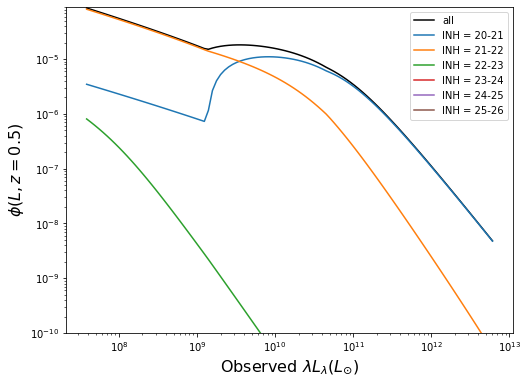

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.plot(10**lLlam, phi_all, 'k-',label='all')
for k, lNH in enumerate(lNH_values):
    ax.plot(10**lLlam, phi_NH[k], label='lNH = {:.0f}-{:.0f}'.format(lNH,lNH+1))
ax.set_ylim([1e-10, ax.get_ylim()[1]])
ax.legend()
ax.loglog()
ax.set_xlabel(r"Observed $\lambda L_{\lambda} (L_{\odot})$", fontsize=16)
ax.set_ylabel(r"$\phi(L,z={:.1f})$".format(z), fontsize=16)
plt.show()

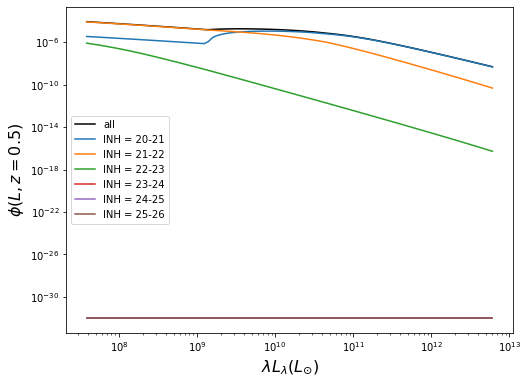

In [10]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.plot(10.**lLlam, phi_all, 'k-',label='all')
for k, lNH in enumerate(lNH_values):
    ax.plot(10.**lLlam, phi_NH[k], label='lNH = {:.0f}-{:.0f}'.format(lNH,lNH+1))
ax.legend()
ax.loglog()
ax.set_xlabel(r"$\lambda L_{\lambda} (L_{\odot})$", fontsize=16)
ax.set_ylabel(r"$\phi(L,z={:.1f})$".format(z), fontsize=16)
plt.show()

In [11]:
from qlfhosts.util.magCount import MagCount

In [12]:
Nagn_obj = MagCount()

In [13]:
N_all, m_all = Nagn_obj.calc(zmin=0.3, zmax=6.7, nz=50, lam_eff_filter=lam_eff_filter, m_faint=m_faint, m_bright=m_bright, m_zp_jy=m_zp_jy)

In [15]:
lNH_min_values = np.array([20.,21.,22.])
lNH_max_values = np.array([21.,22.,26.])
N_NH = np.zeros((len(lNH_min_values),len(N_all)))
for k, lNH_min in enumerate(lNH_min_values):
    N_NH[k], m_aux =  Nagn_obj.calc(zmin=0.3, zmax=6.7, nz=50, lam_eff_filter=lam_eff_filter, m_faint=m_faint, m_bright=m_bright, m_zp_jy=m_zp_jy, lNH_min=lNH_min, lNH_max=lNH_max_values[k])


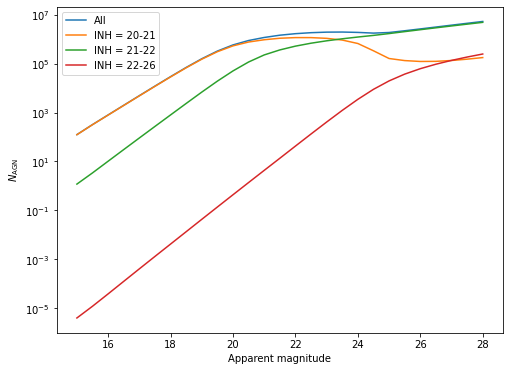

In [16]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.plot(m_all, N_all, label='All')
for k, lNH_min in enumerate(lNH_min_values):
    ax.plot(m_all, N_NH[k], label='lNH = {:.0f}-{:.0f}'.format(lNH_min, lNH_max_values[k]))
ax.set_xlabel('Apparent magnitude')
ax.set_ylabel(r'$N_{\rm AGN}$')
ax.set_yscale('log')
ax.legend()
plt.show()